# Clustering
The dating profiles

### Importing Libraries and Data

In [76]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabaz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

In [127]:
# Loading in the cleaned DF
with open("profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5,3,4,1,3,6,7
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7,9,5,1,9,4,0
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1,2,6,5,6,5,4
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5,2,7,8,2,6,6
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6,6,6,4,3,6,3
5,Pop culture junkie. Tv buff. Reader. Friendly travel expert. Incurable twitteraholic. Social media ninja. Coffee enthusiast. Internet specialist.,0,5,7,5,9,2,0
6,Typical thinker. Amateur explorer. Reader. Extreme student. Tv fanatic. Social media ninja.,5,4,7,5,0,8,4
7,Zombie maven. Travel geek. Professional social media buff. Avid pop culture lover.,9,8,8,2,0,0,5
8,Lifelong introvert. General travel maven. Hipster-friendly web trailblazer. Writer. Alcohol fan. Student. Communicator. Coffee guru.,8,8,2,6,1,2,9
9,Travel ninja. Amateur pop culture evangelist. Web fanatic. Freelance communicator. Zombie geek.,9,0,2,2,5,6,8


## Scaling the Categories

In [128]:
# Instantiating the Scaler
scaler = MinMaxScaler()

# Scaling the categories then replacing the old values
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,0.555556,0.333333,0.444444,0.111111,0.333333,0.666667,0.777778
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,0.777778,1.000000,0.555556,0.111111,1.000000,0.444444,0.000000
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,0.111111,0.222222,0.666667,0.555556,0.666667,0.555556,0.444444
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,0.555556,0.222222,0.777778,0.888889,0.222222,0.666667,0.666667
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,0.666667,0.666667,0.666667,0.444444,0.333333,0.666667,0.333333
5,Pop culture junkie. Tv buff. Reader. Friendly travel expert. Incurable twitteraholic. Social media ninja. Coffee enthusiast. Internet specialist.,0.000000,0.555556,0.777778,0.555556,1.000000,0.222222,0.000000
6,Typical thinker. Amateur explorer. Reader. Extreme student. Tv fanatic. Social media ninja.,0.555556,0.444444,0.777778,0.555556,0.000000,0.888889,0.444444
7,Zombie maven. Travel geek. Professional social media buff. Avid pop culture lover.,1.000000,0.888889,0.888889,0.222222,0.000000,0.000000,0.555556
8,Lifelong introvert. General travel maven. Hipster-friendly web trailblazer. Writer. Alcohol fan. Student. Communicator. Coffee guru.,0.888889,0.888889,0.222222,0.666667,0.111111,0.222222,1.000000
9,Travel ninja. Amateur pop culture evangelist. Web fanatic. Freelance communicator. Zombie geek.,1.000000,0.000000,0.222222,0.222222,0.555556,0.666667,0.888889


## Vectorizing the Bios

In [79]:
# Instantiating the Vectorizer
vectorizer = CountVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])

In [80]:
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_wrds

,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,avid,award,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [81]:
# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
new_df

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.555556,0.333333,0.444444,0.111111,0.333333,0.666667,0.777778,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.777778,1.000000,0.555556,0.111111,1.000000,0.444444,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.111111,0.222222,0.666667,0.555556,0.666667,0.555556,0.444444,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.555556,0.222222,0.777778,0.888889,0.222222,0.666667,0.666667,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.666667,0.666667,0.666667,0.444444,0.333333,0.666667,0.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.000000,0.555556,0.777778,0.555556,1.000000,0.222222,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.555556,0.444444,0.777778,0.555556,0.000000,0.888889,0.444444,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.000000,0.888889,0.888889,0.222222,0.000000,0.000000,0.555556,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0.888889,0.888889,0.222222,0.666667,0.111111,0.222222,1.000000,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9,1.000000,0.000000,0.222222,0.222222,0.555556,0.666667,0.888889,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Performing PCA on the DF
Reducing the dimensionality of the dataset with Principal Component Analysis

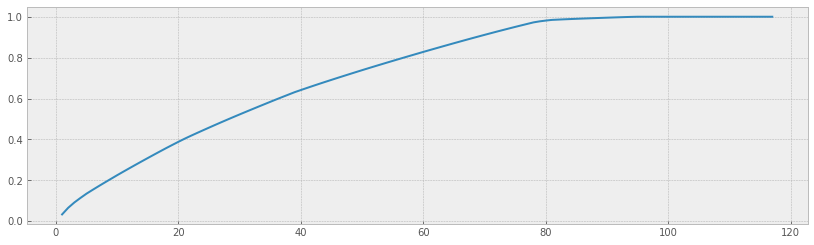

Number features: 85
Total Variance Explained: 0.9910536253090324


In [82]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_99 = new_df.shape[1] - n_over_99

print(f"Number features: {n_to_reach_99}\nTotal Variance Explained: {total_explained_variance[n_to_reach_99]}")

In [83]:
# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_99)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

0.9898749722757194

## Hierarchical Agglomerative Clustering

Running HAC initially with the PCA DF to test it out

In [84]:
# Instantiating KMeans
hac = AgglomerativeClustering(n_clusters=4)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

# Setting an evaluation score or metric
print(calinski_harabaz_score(df_pca, cluster_assignments))

110.65468893836183


### Finding the Optimum Number of Clusters

In [86]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabaz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_d

### Plotting the Evaluation Scores for Different Evaluation Metrics

In [112]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

### Calinski-Harabasz
A higher scores means better defined clusters.  Aiming for a high score

Max Value:
Cluster #    Cluster Score
2     119.088724

Min Value:
Cluster #     Cluster Score
19      57.661027


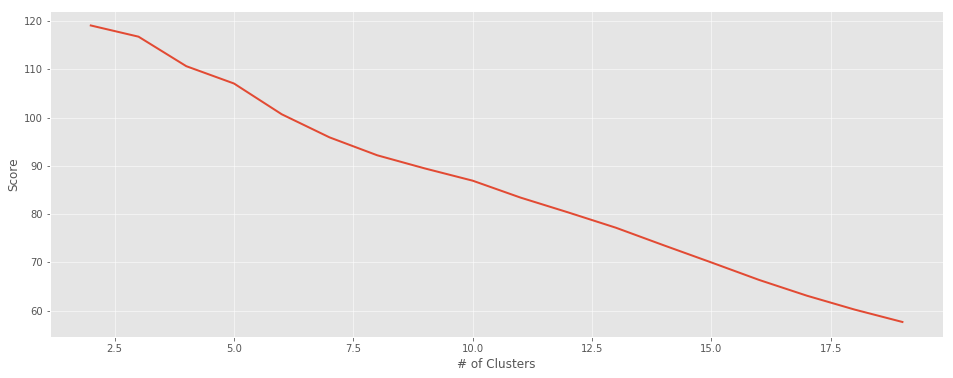

In [114]:
plot_evaluation(ch_scores)

### Silhouette Coefficient
A higher score means better defined clusters. Aim for high score.

Max Value:
Cluster #     Cluster Score
12       0.031083

Min Value:
Cluster #    Cluster Score
2       0.016023


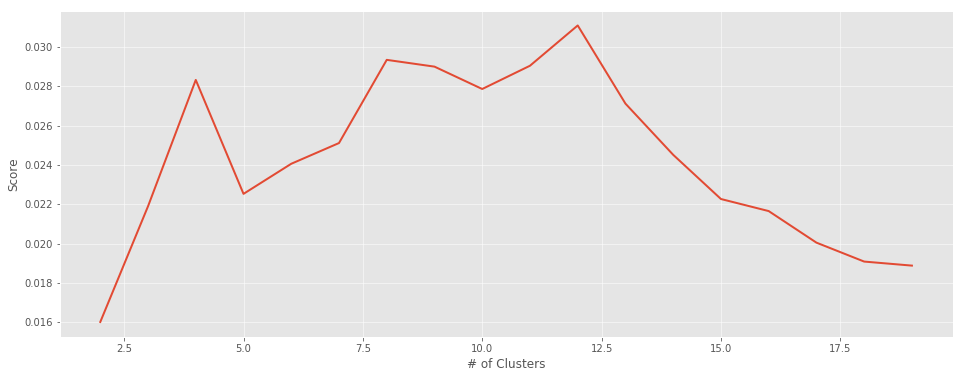

In [115]:
plot_evaluation(s_scores)

### Davies-Bouldin
A lower score is better.  Scores closer to zero are better.

Max Value:
Cluster #    Cluster Score
2        5.34173

Min Value:
Cluster #     Cluster Score
12       3.997348


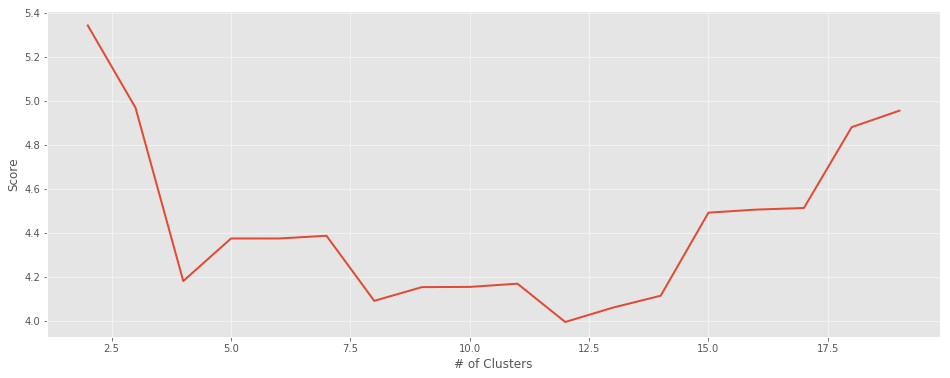

In [116]:
plot_evaluation(db_scores)

## Running the Final Clustering Algorithm

In [117]:
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=12)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

In [129]:
# Unscaling the categories then replacing the scaled values
df = df[['Bios']].join(pd.DataFrame(scaler.inverse_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5.0,3.0,4.0,1.0,3.0,6.0,7.0
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7.0,9.0,5.0,1.0,9.0,4.0,0.0
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1.0,2.0,6.0,5.0,6.0,5.0,4.0
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5.0,2.0,7.0,8.0,2.0,6.0,6.0
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6.0,6.0,6.0,4.0,3.0,6.0,3.0
5,Pop culture junkie. Tv buff. Reader. Friendly travel expert. Incurable twitteraholic. Social media ninja. Coffee enthusiast. Internet specialist.,0.0,5.0,7.0,5.0,9.0,2.0,0.0
6,Typical thinker. Amateur explorer. Reader. Extreme student. Tv fanatic. Social media ninja.,5.0,4.0,7.0,5.0,0.0,8.0,4.0
7,Zombie maven. Travel geek. Professional social media buff. Avid pop culture lover.,9.0,8.0,8.0,2.0,0.0,0.0,5.0
8,Lifelong introvert. General travel maven. Hipster-friendly web trailblazer. Writer. Alcohol fan. Student. Communicator. Coffee guru.,8.0,8.0,2.0,6.0,1.0,2.0,9.0
9,Travel ninja. Amateur pop culture evangelist. Web fanatic. Freelance communicator. Zombie geek.,9.0,0.0,2.0,2.0,5.0,6.0,8.0


In [132]:
# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics,Cluster #
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5.0,3.0,4.0,1.0,3.0,6.0,7.0,9
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7.0,9.0,5.0,1.0,9.0,4.0,0.0,9
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1.0,2.0,6.0,5.0,6.0,5.0,4.0,1
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5.0,2.0,7.0,8.0,2.0,6.0,6.0,9
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6.0,6.0,6.0,4.0,3.0,6.0,3.0,10
5,Pop culture junkie. Tv buff. Reader. Friendly travel expert. Incurable twitteraholic. Social media ninja. Coffee enthusiast. Internet specialist.,0.0,5.0,7.0,5.0,9.0,2.0,0.0,1
6,Typical thinker. Amateur explorer. Reader. Extreme student. Tv fanatic. Social media ninja.,5.0,4.0,7.0,5.0,0.0,8.0,4.0,4
7,Zombie maven. Travel geek. Professional social media buff. Avid pop culture lover.,9.0,8.0,8.0,2.0,0.0,0.0,5.0,1
8,Lifelong introvert. General travel maven. Hipster-friendly web trailblazer. Writer. Alcohol fan. Student. Communicator. Coffee guru.,8.0,8.0,2.0,6.0,1.0,2.0,9.0,0
9,Travel ninja. Amateur pop culture evangelist. Web fanatic. Freelance communicator. Zombie geek.,9.0,0.0,2.0,2.0,5.0,6.0,8.0,1


In [131]:
# Checking cluster groups
df[df['Cluster #']==1]

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics,Cluster #
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1.0,2.0,6.0,5.0,6.0,5.0,4.0,1
5,Pop culture junkie. Tv buff. Reader. Friendly travel expert. Incurable twitteraholic. Social media ninja. Coffee enthusiast. Internet specialist.,0.0,5.0,7.0,5.0,9.0,2.0,0.0,1
7,Zombie maven. Travel geek. Professional social media buff. Avid pop culture lover.,9.0,8.0,8.0,2.0,0.0,0.0,5.0,1
9,Travel ninja. Amateur pop culture evangelist. Web fanatic. Freelance communicator. Zombie geek.,9.0,0.0,2.0,2.0,5.0,6.0,8.0,1
15,Avid pop culture fanatic. Social media enthusiast. Incurable introvert. Typical web maven. Reader.,6.0,9.0,0.0,3.0,0.0,6.0,2.0,1
21,Entrepreneur. Friendly zombie aficionado. Organizer. Passionate coffee geek. Avid introvert. Pop culture trailblazer.,6.0,5.0,8.0,5.0,7.0,9.0,8.0,1
22,Lifelong coffee expert. Friendly twitter practitioner. General internet geek. Food nerd. Pop culture fanatic. Thinker.,2.0,3.0,0.0,9.0,3.0,6.0,1.0,1
24,Zombieaholic. Lifelong music junkie. Writer. Devoted communicator. General pop culture fan. Unapologetic gamer.,8.0,9.0,1.0,4.0,8.0,0.0,7.0,1
40,Travel nerd. Typical problem solver. Communicator. Entrepreneur. Pop culture ninja. Proud twitteraholic. Unapologetic web aficionado.,7.0,1.0,7.0,0.0,8.0,1.0,8.0,1
42,Unapologetic pop culture specialist. Social mediaholic. Incurable web fanatic. Tv trailblazer. Zombie nerd. Twitter fan.,1.0,6.0,6.0,2.0,0.0,1.0,2.0,1
